In [1]:
import os
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd 
from file_rw import *
from ast import literal_eval
from datetime import datetime
from pandas_datareader import data  


start_date = datetime(2019,1,1)
end_date = datetime(2021,3,1)

stock_code_df = pd.read_csv('drop_na_df.csv', index_col = 0)[['회사명', '종목코드']]
stock_code_df = stock_code_df[['회사명', '종목코드']]
stock_code_df['종목코드'] = stock_code_df['종목코드'].apply(lambda x : str('%06d'%x))


stock_code = "285130"

kospi_df = data.get_data_yahoo("{}.KS".format(stock_code), start_date, end_date) 

kospi_df.loc[:, 'stock_code'] = stock_code
kospi_df.loc[:, 'date'] = kospi_df.index.astype('str')

kospi_df = kospi_df.rename(columns = {
                           'High' : 'high_price',
                           'Low' : 'low_price',
                           'Open' : 'open_price',
                           'Close' : 'close_price',
                           'Volume' :'volume'})

kospi_df.reset_index(drop = True, inplace = True)
kospi_df.drop('Adj Close', axis = 1, inplace = True)

print('회사명 : ', stock_code_df.loc[stock_code_df['종목코드'] == stock_code, '회사명'].values[0])

C:\anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


회사명 :  SK케미칼


In [2]:
# finding the optimum k through elbow method
def get_optimum_clusters(data, saturation_point=0.05):

    wcss = []
    k_models = []

    size = 11
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    k_models.append(kmeans)
        
    plt.plot(range(1,11), wcss)
            
    return k_models

display(kospi_df.tail())

,high_price,low_price,open_price,close_price,volume,stock_code,date
526,380500.0,358000.0,380500.0,361500.0,203894.0,285130,2021-02-22
527,372500.0,352000.0,360000.0,366500.0,220378.0,285130,2021-02-23
528,390500.0,366500.0,369000.0,385000.0,404266.0,285130,2021-02-24
529,397000.0,381000.0,393000.0,385500.0,209812.0,285130,2021-02-25
530,379000.0,368000.0,374000.0,377000.0,182034.0,285130,2021-02-26


In [3]:
low = pd.DataFrame(data=kospi_df['low_price'], index=kospi_df.index)
high = pd.DataFrame(data=kospi_df['high_price'], index=kospi_df.index)


In [7]:
low_high

array([[ 69000.],
       [ 68800.],
       [ 66300.],
       ...,
       [390500.],
       [397000.],
       [379000.]])

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  f"KMeans is known to have a memory leak on Windows "


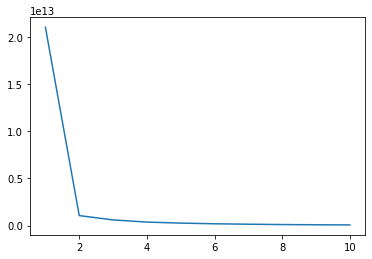

In [14]:
low_high = np.append(low, high)
low_high = low_high.reshape((-1, 1))

# index 3 as 4 is the value of K (elbow point)
clusters = get_optimum_clusters(low_high)[0]

centers = clusters.cluster_centers_

#finding the optimum k using the silhouette method
def optimum_Kvalue(data):
    kmax = 11
    sil = {}
    k_model = {}
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        k_model[k] = kmeans
        labels = kmeans.labels_
        sil[k]=(silhouette_score(data, labels))
    optimum_cluster = k_model[max(sil, key=sil.get)]
    return optimum_cluster
  
low_high_cl = optimum_Kvalue(low_high)

low_high_ce = low_high_cl.cluster_centers_

low ce :  [68382.39895698]
low ce :  [374398.30508475]


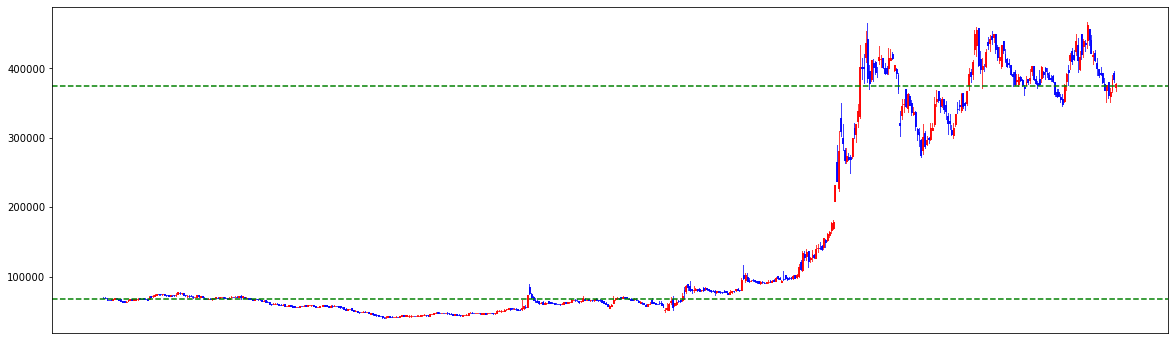

In [15]:
# kospi_df - Stock Price Chart
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(111)

candlestick2_ohlc(ax1, kospi_df['open_price'], kospi_df['high_price'], 
                  kospi_df['low_price'], kospi_df['close_price'],
                  width=0.5, colorup='r', colordown='b')
ax1.xaxis.set_ticks([])
plt.xlabel(None)


for i in low_high_ce:
    print('low ce : ', i)
    ax1.axhline(i, c='g', ls='--', label = '')
plt.show()